In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import pylab as rcParams
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
from sklearn.datasets import make_circles
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
x,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

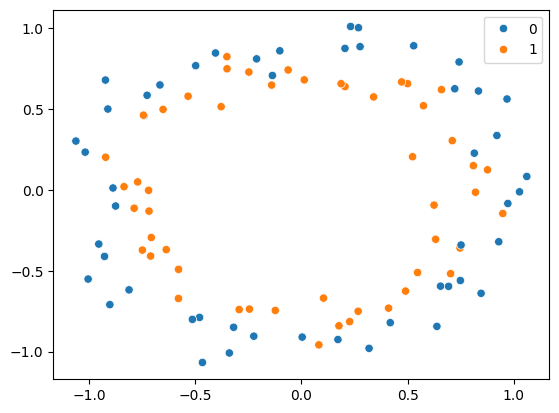

In [ ]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
plot_decision_regions(X_test,y_test.ravel(),clf = model , legend=2)
plt.show()

## **EARLY STOPPING**

In [ ]:
model= Sequential()

model.add(Dense(256,input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

NameError: name 'Sequential' is not defined

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callback=callback)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
plot_decision_regions(X_test,y_test.ravel(),clf = model , legend=2)
plt.show()